In [1]:
import xarray as xr
import numpy as np
import dask.array as da
import os
from datetime import datetime

In [10]:
folders = [folder for folder in os.listdir('./') if os.path.isdir(os.path.join('./', folder))]
folders.sort()


In [28]:
all_paths = []
for folder in folders:
    folder_path = os.path.join('./', folder)

    netcdf_paths = [f'{folder_path}/{nc}' for nc in os.listdir(f'./{folder}/') if nc.endswith('.nc')]
    netcdf_paths.sort()
    all_paths.append(netcdf_paths)
    de = xr.open_mfdataset(netcdf_paths, combine='by_coords', compat='override')
    dates = netcdf_paths[0].split('_')[-1].split('.')[0]
    filename = f'forecast_{folder}_{dates}.nc'
    de.to_netcdf(filename)
    de.close()


In [24]:
all_paths 

[['./r1i1p1/hurs_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/pr_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/psl_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/rsds_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/sfcWind_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/tas_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/tasmax_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc',
  './r1i1p1/tasmin_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250101-20250630.nc'],
 ['./r2i1p1/hurs_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r2i1p1_20250101-20250630.nc',
  './r2i1p1/pr_day_GCFS21--DWD-EPISODES2022--DE-0075x005_sfc20250101_r2i1p1_20250101-20

In [25]:
ds = xr.open_dataset(all_paths[0][2])

In [6]:
# path_org = './r1i1p1/tasmin_day_GCFS22--DWD-EPISODES2022--DE-0075x005_sfc20250101_r1i1p1_20250501-20251130.nc'
path_org = './r1i1p1/tasmin_day_GCFS22--DWD-EPISODES2022--DE-0075x005_sfc20250501_r1i1p1_20250501-20251130.nc'
df_org = xr.open_dataset(path_org)


In [14]:
vals = df_org['tasmin']


In [19]:
old_fc = xr.open_dataset('forecast_r1i1p1_20250301-20250831.nc')
new_fc = xr.open_dataset('forecast_r1i1p1_20250501-20251130.nc')

In [26]:
tasmin_old = old_fc['tasmin'].values
tasmin_new = new_fc['tasmin'].values

In [27]:
tasmin_new.size

5347860

In [25]:
tasmin_old.size


4598160

In [3]:
de = xr.open_mfdataset(netcdf_paths, combine='by_coords')

In [4]:
start = datetime.now()


de.hurs[500:5500, 200, 200]

dur = datetime.now() - start
print(dur.total_seconds())

0.004942


In [16]:
de.close()

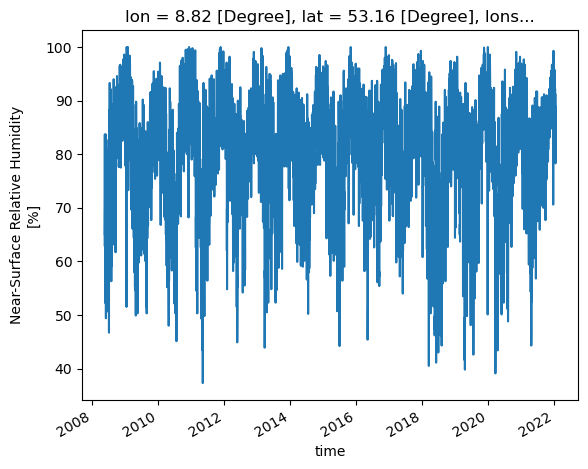

In [5]:
de.hurs[500:5500, 210, 210].plot()

In [18]:
del de

In [12]:
for a in range(200, 300):
    for b in range(200, 300):
        de.pr[2000:3000, a, b]

In [2]:
ds = xr.open_dataset('../../climate_netcdf/zalf_hurs_amber_2025_v1-0.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:             (lon: 654, lat: 866, time: 365)
Coordinates:
  * lon                 (lon) float64 5.873 5.887 5.901 ... 15.01 15.02 15.03
  * lat                 (lat) float64 55.05 55.04 55.03 ... 47.29 47.28 47.27
  * time                (time) datetime64[ns] 2025-01-01 ... 2025-12-31
    lons                (lat, lon) float64 ...
    lats                (lat, lon) float64 ...
    latitude_longitude  int64 ...
Data variables:
    hurs                (time, lat, lon) float32 ...

In [4]:
ds.attrs

{}

In [10]:
hurs = ds.hurs[:, 200, 200].values

In [16]:
valid_indices = np.where(~np.isnan(hurs))[0]

In [17]:
valid_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [18]:

if valid_indices.size > 0:
    last_valid_index = valid_indices[-1]  # Last valid index
    last_valid_date = ds.time.values[last_valid_index] 

In [19]:
last_valid_date 

numpy.datetime64('2025-03-19T00:00:00.000000000')

In [ ]:
def get_last_valid_date(nc_path):
    ds = xr.open_dataset(nc_path)
    hurs = ds.hurs[:, 200, 200].values
    valid_indices = np.where(~np.isnan(hurs))[0]
    if valid_indices.size > 0:
        last_valid_index = valid_indices[-1] 
        last_valid_date = ds.time.values[last_valid_index] 
    else:
        last_valid_date = None
    return last_valid_date

In [52]:
path = 'forecast_r1i1p1_20250301-20250831.nc'
nc = xr.open_dataset(path)

In [60]:
nc.variables['tasmin'].attrs['units']== 'K'

True

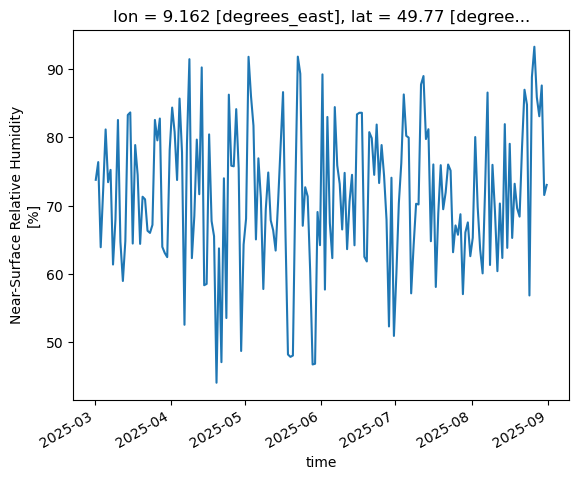

In [78]:
nc.hurs[:, 55, 55].plot()

In [76]:
path2 = '../climate_netcdf/zalf_hurs_amber_2025_v1-0.nc'
nc2 = xr.open_dataset(path2)

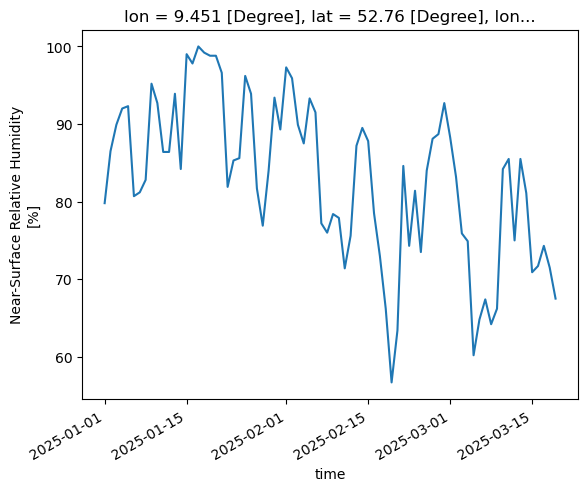

In [77]:
nc2.hurs[:, 255, 255].plot()

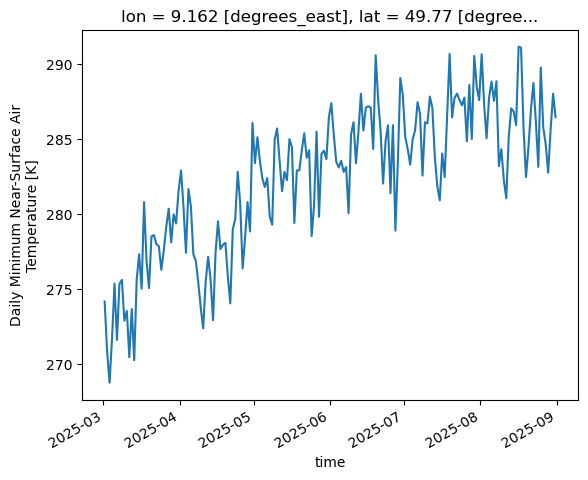

In [50]:
nc.tasmin[:, 55, 55].plot()

In [51]:
nc.variables['tasmin'][:, 55,55].values -273.15

array([ 1.0006104 , -2.3376465 , -4.411255  , -1.448761  ,  2.195404  ,
       -1.5621033 ,  2.1756897 ,  2.4444885 , -0.2781372 ,  0.37228394,
       -2.7070007 ,  0.4978943 , -2.914734  ,  2.4665222 ,  4.1483765 ,
        1.8492432 ,  7.6258545 ,  3.7137756 ,  1.8937073 ,  5.3310547 ,
        5.4267273 ,  4.821228  ,  4.683136  ,  3.1099854 ,  4.405945  ,
        5.9778137 ,  7.1849976 ,  4.9378967 ,  6.807617  ,  6.200165  ,
        8.39151   ,  9.734985  ,  7.3034363 ,  4.2390137 ,  8.493103  ,
        7.3452454 ,  4.1428833 ,  3.702118  ,  2.2554932 ,  0.5882263 ,
       -0.7937317 ,  2.3380737 ,  3.9692688 ,  2.4554749 , -0.24874878,
        4.2372437 ,  6.3465576 ,  4.492523  ,  4.78479   ,  4.90744   ,
        2.6611633 ,  0.87615967,  5.8081665 ,  6.5012817 ,  9.638824  ,
        7.565613  ,  3.2032776 ,  5.2611694 ,  7.625305  ,  5.6666565 ,
       12.900116  , 10.218292  , 11.946472  , 10.379028  ,  9.215637  ,
        8.630188  ,  9.222168  ,  6.6629944 ,  6.118164  , 11.79

In [45]:
nc.variables['tasmin'].attrs['units']

'K'

In [28]:
tasmin = [5.947998046875, 5.4503173828125, 5.4503173828125, 7.545684814453125, 7.816986083984375, 11.452667236328125, 5.454986572265625, 9.404632568359375, 9.5999755859375, 11.162017822265625, 8.397613525390625, 8.261962890625, 7.6263427734375, 5.194610595703125, 6.70233154296875, 11.878997802734375, 10.990631103515625, 11.2642822265625, 6.96661376953125, 9.434051513671875, 10.442626953125, 10.754974365234375, 6.56201171875, 9.303009033203125, 14.983673095703125, 14.305328369140625, 11.7139892578125, 14.383636474609375, 12.742584228515625, 14.75732421875, 15.89532470703125, 12.185943603515625, 11.195343017578125, 11.942657470703125, 14.5216064453125, 8.4403076171875, 11.640289306640625, 10.88299560546875, 10.880615234375, 10.10699462890625, 10.906982421875, 11.702301025390625, 13.847991943359375, 10.895294189453125, 10.164306640625, 12.721649169921875, 13.888336181640625, 13.912322998046875, 13.730987548828125, 12.093017578125, 14.0689697265625, 14.3836669921875, 12.71002197265625, 11.55499267578125, 13.4503173828125, 13.588348388671875, 13.3572998046875, 11.80230712890625, 16.695343017578125, 18.72393798828125, 18.819305419921875, 17.323974609375, 14.966644287109375, 16.95733642578125, 15.609283447265625, 11.6929931640625, 14.42864990234375, 13.399993896484375, 16.011627197265625, 16.98828125, 17.088287353515625, 13.86663818359375, 13.899993896484375, 13.526336669921875, 16.443389892578125, 17.58367919921875, 11.757354736328125, 17.359649658203125, 16.375946044921875, 11.558929443359375, 13.140289306640625, 16.186004638671875, 13.08135986328125, 14.79534912109375, 9.540313720703125, 11.773651123046875, 16.621673583984375, 16.5689697265625, 15.121673583984375, 12.323974609375, 15.92633056640625, 16.855010986328125, 15.255035400390625, 14.497650146484375, 11.702301025390625, 13.2906494140625, 12.128662109375, 12.510040283203125, 9.70233154296875, 11.018585205078125, 17.08599853515625, 13.226318359375, 12.5, 7.95428466796875, 14.17901611328125, 12.028656005859375, 14.864288330078125, 12.113983154296875, 13.9139404296875, 15.566650390625, 11.45733642578125, 11.23101806640625, 13.726318359375, 12.050323486328125, 9.988311767578125, 14.7239990234375, 10.14495849609375, 13.719329833984375, 12.64801025390625, 6.057342529296875, 10.15966796875, 5.066650390625, 10.5386962890625, 9.48602294921875, 8.252655029296875, 8.878265380859375, 8.850311279296875, 3.99066162109375, 6.40069580078125, 6.27899169921875, 6.392974853515625, 7.473663330078125, 4.33331298828125, 4.46429443359375, 5.435638427734375, 6.859649658203125, 5.24261474609375, 4.571319580078125, 5.20465087890625, 9.945709228515625, 15.021697998046875, 9.59527587890625, 12.183685302734375, 13.33331298828125, 12.11700439453125, 6.9403076171875, 8.08599853515625, 5.7550048828125, 7.668975830078125, 5.98907470703125, 5.689056396484375, 5.2890625, 3.326263427734375, 7.0743408203125, 4.662017822265625, 5.238677978515625, 3.6573486328125, -1.2093505859375, -1.413970947265625, 2.5169677734375, 1.590667724609375, 7.257354736328125, 7.50067138671875, 4.24566650390625, 2.212310791015625, 7.85498046875, 8.14569091796875, 6.70770263671875, 9.505340576171875, 8.876678466796875, 6.85498046875, 6.867340087890625, 7.17431640625, 1.8836669921875, 5.81396484375, 7.5789794921875, 4.143341064453125, 1.659637451171875, 8.038665771484375, 7.65032958984375, 8.474365234375, 2.1240234375, 2.269683837890625, 1.761993408203125, 2.316986083984375, 0.24102783203125, 1.385986328125, -2.14031982421875, -0.2093505859375, -2.8380126953125, 1.540985107421875, 1.45263671875, -0.0853271484375, -2.7783203125, -9.533355712890625, -8.57135009765625, -0.030303955078125, -0.082977294921875, -5.233367919921875]
tas =  [8.90771484375, 10.285980224609375, 10.347991943359375, 9.972015380859375, 12.019317626953125, 15.24334716796875, 14.205352783203125, 16.045684814453125, 16.15032958984375, 15.36895751953125, 17.8883056640625, 15.376678466796875, 15.923980712890625, 14.99530029296875, 12.388336181640625, 16.628662109375, 14.4813232421875, 18.121673583984375, 15.823974609375, 14.905364990234375, 13.795318603515625, 13.6240234375, 13.82867431640625, 16.9456787109375, 17.050323486328125, 18.812347412109375, 19.250335693359375, 19.345611572265625, 18.885986328125, 20.74566650390625, 21.6053466796875, 19.40533447265625, 17.855010986328125, 19.250335693359375, 19.1456298828125, 17.59765625, 18.952667236328125, 18.483673095703125, 19.63336181640625, 17.95733642578125, 16.0643310546875, 17.579010009765625, 15.141021728515625, 12.99298095703125, 12.261993408203125, 15.219329833984375, 16.421661376953125, 16.045684814453125, 20.35498046875, 15.850341796875, 17.55499267578125, 14.947998046875, 14.512359619140625, 14.619354248046875, 15.850311279296875, 15.94097900390625, 15.688323974609375, 19.55035400390625, 22.754974365234375, 23.745635986328125, 23.840972900390625, 22.67669677734375, 21.85498046875, 22.766693115234375, 25.823974609375, 24.026336669921875, 21.39300537109375, 21.2813720703125, 18.759674072265625, 23.97900390625, 24.048004150390625, 23.221649169921875, 19.52166748046875, 18.183685302734375, 22.976715087890625, 21.507659912109375, 16.026336669921875, 20.212371826171875, 23.366607666015625, 20.818634033203125, 21.254974365234375, 20.83099365234375, 20.581329345703125, 20.245697021484375, 18.65966796875, 21.1883544921875, 23.68133544921875, 22.783660888671875, 19.0743408203125, 19.621673583984375, 21.1573486328125, 19.27435302734375, 19.245697021484375, 16.8836669921875, 18.70233154296875, 16.71002197265625, 16.421630859375, 14.865020751953125, 14.814666748046875, 19.1240234375, 20.510009765625, 19.457305908203125, 14.871307373046875, 15.17364501953125, 17.545684814453125, 19.566650390625, 20.99298095703125, 17.775970458984375, 19.95733642578125, 20.845672607421875, 16.847991943359375, 17.195343017578125, 21.9169921875, 21.1309814453125, 16.61700439453125, 16.474365234375, 17.390655517578125, 15.61468505859375, 14.316986083984375, 11.4146728515625, 12.657318115234375, 11.376678466796875, 13.5743408203125, 14.8526611328125, 13.95965576171875, 15.579010009765625, 10.954986572265625, 9.683685302734375, 7.77435302734375, 8.607666015625, 10.316986083984375, 10.49066162109375, 8.61468505859375, 10.983642578125, 10.98834228515625, 10.217010498046875, 9.52398681640625, 8.314697265625, 9.324005126953125, 12.907745361328125, 16.812347412109375, 17.1053466796875, 15.67669677734375, 16.1573486328125, 13.447998046875, 9.61700439453125, 8.447998046875, 7.910003662109375, 9.345672607421875, 9.076690673828125, 8.77667236328125, 8.4456787109375, 7.416961669921875, 9.21466064453125, 8.995330810546875, 8.543365478515625, 5.910003662109375, 3.048004150390625, 2.74334716796875, 8.24566650390625, 3.588348388671875, 8.779022216796875, 11.34564208984375, 7.7550048828125, 6.6099853515625, 10.345672607421875, 8.64801025390625, 9.019317626953125, 11.90301513671875, 10.9813232421875, 9.25732421875, 8.250335693359375, 8.014678955078125, 4.812347412109375, 8.55499267578125, 10.107696533203125, 4.84100341796875, 5.350341796875, 10.267333984375, 10.93402099609375, 10.183685302734375, 5.579010009765625, 3.17901611328125, 2.919342041015625, 4.0743408203125, 4.38134765625, 2.74566650390625, 1.654998779296875, 0.7860107421875, -0.673675537109375, 4.07666015625, 4.71234130859375, 3.58135986328125, -1.580657958984375, -6.89532470703125, -5.335662841796875, 0.850341796875, 0.545684814453125, 0.114654541015625]

FileNotFoundError: [Errno 2] No such file or directory: '/home/colja/01_Code/01_SWN/Spreewasser-N/app/monica/climate_netcdf_forecast/zalf_tasmin_amber_2025_v1-0.nc'